#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesperson Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 19, 2021*
**Devilry**: https://devilry.ifi.uio.no

## What to deliver?
On the Devilry website, upload one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [7]:
# imports and reading csv

import numpy as np
import pandas as pd
from itertools import permutations
import time
import matplotlib.pyplot as plt

cities_table = pd.read_csv("european_cities.csv", sep=';')
Cities = cities_table.to_numpy()

([0], 0.0)
n = 1,  time: 0.0 sec

([0, 1], 3056.26)
n = 2,  time: 0.0 sec

([0, 1, 2], 4024.99)
n = 3,  time: 0.0 sec

([0, 1, 2, 3], 4241.89)
n = 4,  time: 0.0 sec

([0, 1, 4, 2, 3], 4983.38)
n = 5,  time: 0.0 sec

([1, 0, 3, 2, 5, 4], 5018.8099999999995)
n = 6,  time: 0.0 sec

([2, 6, 3, 0, 1, 4, 5], 5487.889999999999)
n = 7,  time: 0.03126406669616699 sec

([3, 7, 0, 1, 4, 5, 2, 6], 6667.489999999999)
n = 8,  time: 0.29155659675598145 sec

([3, 7, 0, 1, 4, 5, 2, 6, 8], 6678.549999999999)
n = 9,  time: 2.7278943061828613 sec

([8, 3, 7, 0, 1, 9, 4, 5, 2, 6], 7486.309999999999)
n = 10,  time: 30.340554237365723 sec



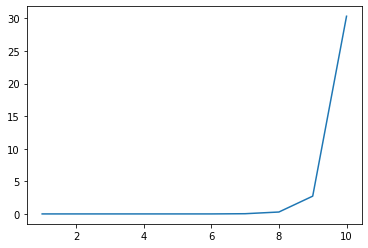

In [1]:
def exhaustive(Cities, n):
    """
    Input:
        Cities (numpy array):
            Array of distances between cities.
        n (int):
            Number of cities the subbset.
    
    Output:
        best_perm (list):
            Shortest path.
        best_distance (float):
            Length of shortest path.
    """
    array = Cities[0:n, 0:n] # cuts down the cities 'table' to the n first cities
    l = list(range(0,n))
    perms = permutations(l) # makes all possible permutations of cities
    
    best_distance = np.inf # positive float infinity
    best_perm = []
    for perm in perms:
        distance = 0
        for i in range(n):
            distance += array[perm[i-1]][perm[i]] 
        if distance < best_distance:
            best_distance = distance
            best_perm = list(perm)
    
    return best_perm, best_distance;


plot_points = []
r = range(2,11)
for n in r: # change range or make list of values to test different number of cities (n>10 is not recomended)
    start = time.time()
    print(exhaustive(Cities, n))
    end = time.time()
    print(f"n = {n},  time: {end - start} sec")
    print("")
    plot_points.append(end - start)
    
plt.plot(r, plot_points)
plt.show()

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [2]:
n = 10
start = time.time()
perm, distance = (exhaustive(Cities, n))
end = time.time()
c = [cities_table.columns[i] for i in range(n)]

print(f"Distace = {distance},\n  Order = {c},\n   Time = {end - start}")


# n! permutations for n cities
# n = 10 checks 10!=3,628,800 permutations in 16 seconds
# Giving 16/3,628,800 = 4.4e-6 seconds per permutation
#
# 24! = 620,448,401,733,239,439,360,000
# 24! * 4.4e-6 = 2,735,663,146,971,955,200 seconds
# Whitch is 86,747,309,328 years

Distace = 7486.309999999999,
  Order = ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul'],
   Time = 32.91874146461487


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

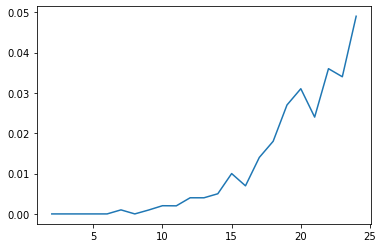

In [28]:
def randomPermutation(n):
    """
    Input:
        n (int):
            Number of cities in permutation
    Output:
        permutation (list):
            A random permutation of ints from 0 to n-1
    """
    cities_array = list(range(n))
    permutation = []
    
    for i in range(n):
        randomCity = cities_array[np.random.randint(len(cities_array))]
        permutation.append(randomCity)
        cities_array.remove(randomCity)

    return permutation

def lengthOfRoute(Cities, permutation):
    """
    Input:
        Cities (numpy array):
            Array of distances between cities. 
        permutation (list):
            A random permutation of ints from 0 to n-1
    
    Outut:
        length (float):
            Length of path described py permutation.
    """
    nCities = Cities[0:n, 0:n]
    length = 0
    for i in range(len(permutation)):
        length += nCities[permutation[i - 1]][permutation[i]]
    return length

def getNeighbours(permutation):
    """
    Input:
        permutation (list):
            A random permutation of ints from 0 to n-1
    Output:
        neighbours (list):
            List of neighbouring permutations to input permutation.
    """
    neighbours = []
    for i in range(len(permutation)):
        for j in range(i + 1, len(permutation)):
            neighbour = permutation.copy()
            neighbour[i] = permutation[j]
            neighbour[j] = permutation[i]
            neighbours.append(neighbour)
    return neighbours

def bestNeighbour(Cities, neighbours):
    """
    Input:
        Cities (numpy array):
            Array of distances between cities. 
        neighbours (list):
            List of neighbouring permutations.
            
    Output:
        best_neighbour (list):
            Best/shortest path in neighbours set.
        best_length (float):
            Length of  best_neighbour path.
    """
    best_length = lengthOfRoute(Cities, neighbours[0])
    best_neighbour = neighbours[0]
    for neighbour in neighbours:
        length = lengthOfRoute(Cities, neighbour)
        if length < best_length:
            best_length = length
            best_neighbour = neighbour
            
    return best_neighbour, best_length
                   
def hillClimb(Cities, n):
    """
    Input:
        Cities (numpy array):
            Array of distances between cities.
        n (int):
            Number of cities the subbset.
    
    Output:
        currentSolution (list):
            Best solution/permutation found by hill climb.
        currentLength (float):
            Length of currentSolution path.
    """
    currentSolution = randomPermutation(n)
    currentLength = lengthOfRoute(Cities, currentSolution)
    neighbours = getNeighbours(currentSolution)
    
    best_neighbour, best_neighbour_lenght = bestNeighbour(Cities, neighbours)
    
    while best_neighbour_lenght < currentLength:
        currentSolution = best_neighbour
        currentLength = best_neighbour_lenght
        neighbours = getNeighbours(currentSolution)
        best_neighbour, best_neighbour_lenght = bestNeighbour(Cities, neighbours)
        
    return currentSolution, currentLength

plot_points = []
r = range(2,25)
for n in r:
    start = time.time()
    Solution, Length = hillClimb(Cities, n)
    end = time.time()
    #print(f"Solution = {Solution},  Length = {Length}")
    #print(f"n = {n},  time: {end - start} sec")
    #print("")
    plot_points.append(end - start)
    
plt.plot(r, plot_points)
plt.show()

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

In [46]:
def Initialize(m, n):
    """
    Input:
        m (int):
            Size of population.
        n (int):
            Size of a singele sloution.
    
    Output:
        initialPopulation (list):
            A set of m random soluutions.
    """
    initialPopulation = []
    
    for i in range(m):
        # Same as randomPermutation()
        cities_array = list(range(n))
        solution = []

        for j in range(n):
            randomCity = cities_array[np.random.randint(len(cities_array))]
            solution.append(randomCity)
            cities_array.remove(randomCity)

        initialPopulation.append(solution)
        
    return initialPopulation

def fitness(Cities, solution):
    """
    Input:
        Cities (numpy array):
            Array of distances between cities. 
        solution (list):
            A random solution (ints from 0 to n-1)
    
    Outut:
        length (float):
            Length of path described py permutation.
    """
    nCities = Cities[0:n, 0:n]
    length = 0
    for i in range(len(solution)):
        length += nCities[solution[i - 1]][solution[i]]
    return length

def parentSelection():
    pass
    
def crossover():
    pass

def muttation():
    pass

def mating():
    pass

def survivorSelection():
    pass

initialPopulation = Initialize(100, 24)


Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [1]:
# Implement algorithm here